In [83]:
import numpy as np
import pandas as pd

In [84]:
df = pd.read_csv("../Dataset/athlete_events.csv")
region_df = pd.read_csv("../Dataset/noc_regions.csv")

In [85]:
df.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
62143,31823,Simon Ekeno,M,26.0,178.0,58.0,Kenya,KEN,1972 Summer,1972,Summer,Munich,Shooting,"Shooting Mixed Small-Bore Rifle, Prone, 50 metres",NaN
180276,90600,Edgardo Pailos Rugna,M,24.0,180.0,79.0,Argentina,ARG,1992 Summer,1992,Summer,Barcelona,Hockey,Hockey Men's Hockey,NaN
257020,128697,Ratu Tevita Waranaivalu,M,20.0,172.0,72.0,Fiji,FIJ,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Men's Football,NaN
39521,20335,Chen Zhong,F,25.0,183.0,73.0,China,CHN,2008 Summer,2008,Summer,Beijing,Taekwondo,Taekwondo Women's Heavyweight,NaN
100511,50829,Nicolas Huet,M,29.0,184.0,85.0,France,FRA,2006 Winter,2006,Winter,Torino,Snowboarding,Snowboarding Men's Parallel Giant Slalom,NaN


In [86]:
region_df.sample(5)

,NOC,region,notes
91,INA,Indonesia,NaN
14,AZE,Azerbaijan,NaN
122,LUX,Luxembourg,NaN
65,ETH,Ethiopia,NaN
189,SUD,Sudan,NaN


In [87]:
df.shape

(271116, 15)

In [88]:
# Here we are consodering only the summer olympics
df = df[df['Season'] == 'Summer']
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [89]:
df.shape

(222552, 15)

In [90]:
df = df.merge(region_df, how='left', on='NOC')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [91]:
# Total number of countries participated
print(df['region'].unique())
print(len(df['region'].unique()))

['China' 'Denmark' 'Netherlands' 'Finland' 'Norway' 'Romania' 'Estonia'
 'France' 'Morocco' 'Spain' 'Egypt' 'Iran' 'Bulgaria' 'Italy' 'Chad'
 'Azerbaijan' 'Sudan' 'Russia' 'Argentina' 'Cuba' 'Belarus' 'Greece'
 'Cameroon' 'Turkey' 'Chile' 'Mexico' 'USA' 'Nicaragua' 'Hungary'
 'Nigeria' 'Algeria' 'Kuwait' 'Bahrain' 'Pakistan' 'Iraq' 'Syria'
 'Lebanon' 'Qatar' 'Malaysia' 'Germany' 'Canada' 'Ireland' 'Australia'
 'South Africa' 'Eritrea' 'Tanzania' 'Jordan' 'Tunisia' 'Libya' 'Belgium'
 'Djibouti' 'Palestine' 'Comoros' 'Kazakhstan' 'Brunei' 'India'
 'Saudi Arabia' 'Maldives' 'Ethiopia' 'United Arab Emirates' 'Yemen'
 'Indonesia' 'Philippines' nan 'Uzbekistan' 'Kyrgyzstan' 'Tajikistan'
 'Japan' 'Republic of Congo' 'Switzerland' 'Brazil' 'Monaco' 'Israel'
 'Uruguay' 'Sweden' 'Sri Lanka' 'Armenia' 'Ivory Coast' 'Kenya' 'Benin'
 'UK' 'Ghana' 'Somalia' 'Niger' 'Mali' 'Afghanistan' 'Poland' 'Costa Rica'
 'Panama' 'Georgia' 'Slovenia' 'Guyana' 'New Zealand' 'Portugal'
 'Paraguay' 'Angola' 'Venezu

In [92]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

there are some region , which is not associated with any NOC


In [93]:
df.duplicated().sum()

1385

In [94]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

There are many NAN in the medal, so we cant remove it bcz there are countries without medal win. But we doing OHE for each cat


In [95]:
df = pd.concat([df, pd.get_dummies(df['Medal']).astype(int)],
               axis=1)  # we apply .astype(int) to convert boolean to int
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [96]:
df.groupby("NOC").sum()[['Bronze', 'Gold', 'Silver']
                        ].sort_values("Gold", ascending=False).reset_index()

,NOC,Bronze,Gold,Silver
0,USA,1197,2472,1333
1,URS,596,832,635
2,GBR,620,635,729
3,GER,649,592,538
4,ITA,454,518,474
...,...,...,...,...
225,AHO,0,0,1
226,LBR,0,0,0
227,LCA,0,0,0
228,LES,0,0,0


In the data, if any team won gold medal as a team then here its showing 1 gold medal for each player, instead of 1.
So here need to fix it


In [97]:
df[(df["NOC"] == "IND") & (df["Medal"] == "Gold")]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4460,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191759,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193964,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193965,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
205949,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


Here we can see in the same year same game multiple gold medal, bcz it is showing individual per person.
So we need to remove duplicate base on Year, NOC, Games, Year, Season, City


Medal tally Analysis


In [98]:
medal_telly = df.drop_duplicates(subset=['Team', "NOC", "Games", "Year",
                                         "City", "Sport", "Event", "Medal"])
medal_telly

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222528,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,0,0,1
222530,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN,1,0,0
222536,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Butterfly,NaN,Poland,NaN,0,0,0
222537,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 200 metres Butterfly,NaN,Poland,NaN,0,0,0


In [99]:
medal_telly = medal_telly.groupby("NOC").sum()[['Bronze', 'Silver', 'Gold']
                                               ].sort_values("Gold", ascending=False).reset_index()

In [100]:
medal_telly["total"] = medal_telly["Bronze"] + \
    medal_telly["Silver"] + medal_telly["Gold"]
medal_telly

,NOC,Bronze,Silver,Gold,total
0,USA,708,802,1035,2545
1,URS,294,317,394,1005
2,GBR,300,317,278,895
3,GER,283,261,235,779
4,FRA,287,256,234,777
...,...,...,...,...,...
225,AHO,0,1,0,1
226,LBR,0,0,0,0
227,LCA,0,0,0,0
228,LES,0,0,0,0


Getting year to show in the filter tab


In [105]:
year = df["Year"].unique().tolist()
year.sort()
year.insert(0, "Overall")
year

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

Getting Country to show in the filter tab


In [107]:
# Here county consist of NaN values as well, so we cant directly sort it
# need to remove NaN values first

county = np.unique(df["region"].dropna().values).tolist()
county.sort()
county.insert(0, "Overall")
county

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [111]:
def fetch_medal_tally(df, year, county):
    df = df.drop_duplicates(subset=['Team', "NOC", "Games", "Year",
                                    "City", "Sport", "Event", "Medal"])

    flag = 0
    if year == "Overall" and county == "Overall":
        temp_df = df
    elif year == "Overall" and county != "Overall":
        flag = 1
        temp_df = df[df["region"] == county]
    elif year != "Overall" and county == "Overall":
        temp_df = df[df["Year"] == int(year)]
    elif year != "Overall" and county != "Overall":
        temp_df = df[(df["Year"] == int(year)) & (df["region"] == county)]

    if flag == 1:
        temp_df = temp_df.groupby("Year").sum()[['Bronze', 'Silver', 'Gold']
                                                ].sort_values("Year", ascending=True).reset_index()
    else:
        temp_df = temp_df.groupby("region").sum()[['Bronze', 'Silver', 'Gold']
                                                  ].sort_values("Gold", ascending=False).reset_index()

    temp_df["total"] = temp_df["Bronze"] + \
        temp_df["Silver"] + temp_df["Gold"]

    return temp_df


fetch_medal_tally(df, year="2012", county="India")

,region,Bronze,Silver,Gold,total
0,India,4,2,0,6


Overall Analysis

- No. of editions
- No. of cities
- No. of events/spots
- No. of athletes
- No. of participating nations


In [121]:
print("Total year:", len(df["Year"].unique()))
print("Total City:", len(df["City"].unique()))
print("Total Sport:", len(df["Sport"].unique()))
print("Total Event:", len(df["Event"].unique()))
print("Total Name:", len(df["Name"].unique()))
print("Total Countries:", len(df["region"].unique()))

Total year: 29
Total City:  23
Total Sport:  52
Total Event:  651
Total Name:  116122
Total Countries:  206


In [129]:
# Total number of Country participated in each year
nations_overTime = df.drop_duplicates(["Year", "region"])[
    "Year"].value_counts().reset_index().sort_values("Year")
nations_overTime

,Year,count
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47


In [134]:
import plotly.express as px

country_fig = px.line(nations_overTime, x="Year", y="count")
country_fig.show()

In [133]:
# Total number of events over time
event_overTime = df.drop_duplicates(["Year", "Event"])[
    "Year"].value_counts().reset_index().sort_values("Year")
event_overTime

,Year,count
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109
24,1912,107
14,1920,158
20,1924,131
22,1928,122
21,1932,131


Heatmap to show number of events per year


In [137]:
heatmap_df = df.drop_duplicates(["Year", "Sport", "Event"])

heatmap_df.pivot_table(index="Sport", columns="Year",
                       aggfunc="count").fillna(0).astype(int)

Age                                               ...  \
Year                  1896 1900 1904 1906 1908 1912 1920 1924 1928 1932  ...   
Sport                                                                    ...   
Aeronautics              0    0    0    0    0    0    0    0    0    0  ...   
Alpinism                 0    0    0    0    0    0    0    0    0    1  ...   
Archery                  0    6    6    0    2    0    6    0    0    0  ...   
Art Competitions         0    0    0    0    0    3    5    3   10   13  ...   
Athletics                9   19   23   11   23   30   23   23   22   28  ...   
Badminton                0    0    0    0    0    0    0    0    0    0  ...   
Baseball                 0    0    0    0    0    0    0    0    0    0  ...   
Basketball               0    0    0    0    0    0    0    0    0    0  ...   
Basque Pelota            0    1    0    0    0    0    0    0    0    0  ...   
Beach Volleyball         0    0    0    0    0    0    0    0    0    0  ...   
Boxing                   0    0    4    0    2    0    3    7    5    8  ...   
Canoeing                 0    0    0    0    0    0    0    0    0    0  ...   
Cricket                  0    1    0    0    0    0    0    0    0    0  ...   
Croquet                  0    2    0    0    0    0    0    0    0    0  ...   
Cycling                  3    2    7    0    1    2    4    2    6    6  ...   
Diving                   0    0    1    1    2    4    5    5    4    3  ...   
Equestrianism            0    2    0    0    0    5    6    5    6    6  ...   
Fencing                  3    5    5    2    2    3    5    6    5    7  ...   
Figure Skating           0    0    0    0    4    0    3    0    0    0  ...   
Football                 0    1    1    0    0    1    1    1    0    0  ...   
Golf                     0    2    2    0    0    0    0    0    0    0  ...   
Gymnastics               7    0   11    1    1    4    4    0    8    8  ...   
Handball                 0    0    0    0    0    0    0    0    0    0  ...   
Hockey                   0    0    0    0    1    0    1    0    1    1  ...   
Ice Hockey               0    0    0    0    0    0    1    0    0    0  ...   
Jeu De Paume             0    0    0    0    1    0    0    0    0    0  ...   
Judo                     0    0    0    0    0    0    0    0    0    0  ...   
Lacrosse                 0    0    0    0    1    0    0    0    0    0  ...   
Modern Pentathlon        0    0    0    0    0    1    1    1    1    1  ...   
Motorboating             0    0    0    0    2    0    0    0    0    0  ...   
Polo                     0    1    0    0    1    0    1    1    0    0  ...   
Racquets                 0    0    0    0    2    0    0    0    0    0  ...   
Rhythmic Gymnastics      0    0    0    0    0    0    0    0    0    0  ...   
Roque                    0    0    1    0    0    0    0    0    0    0  ...   
Rowing                   0    4    4    3    3    4    3    4    5    5  ...   
Rugby                    0    1    0    0    1    0    1    1    0    0  ...   
Rugby Sevens             0    0    0    0    0    0    0    0    0    0  ...   
Sailing                  0    4    0    0    4    4    9    3    2    4  ...   
Shooting                 0    2    0   11   10   18   18   10    0    2  ...   
Softball                 0    0    0    0    0    0    0    0    0    0  ...   
Swimming                 0    4   10    2    5    8    9    8    9    9  ...   
Synchronized Swimming    0    0    0    0    0    0    0    0    0    0  ...   
Table Tennis             0    0    0    0    0    0    0    0    0    0  ...   
Taekwondo                0    0    0    0    0    0    0    0    0    0  ...   
Tennis                   0    4    2    2    5    8    3    5    0    0  ...   
Trampolining             0    0    0    0    0    0    0    0    0    0  ...   
Triathlon                0    0    0    0    0    0    0    0    0    0  ...   
Tug-Of-War             

<Axes: xlabel='Year', ylabel='Sport'>

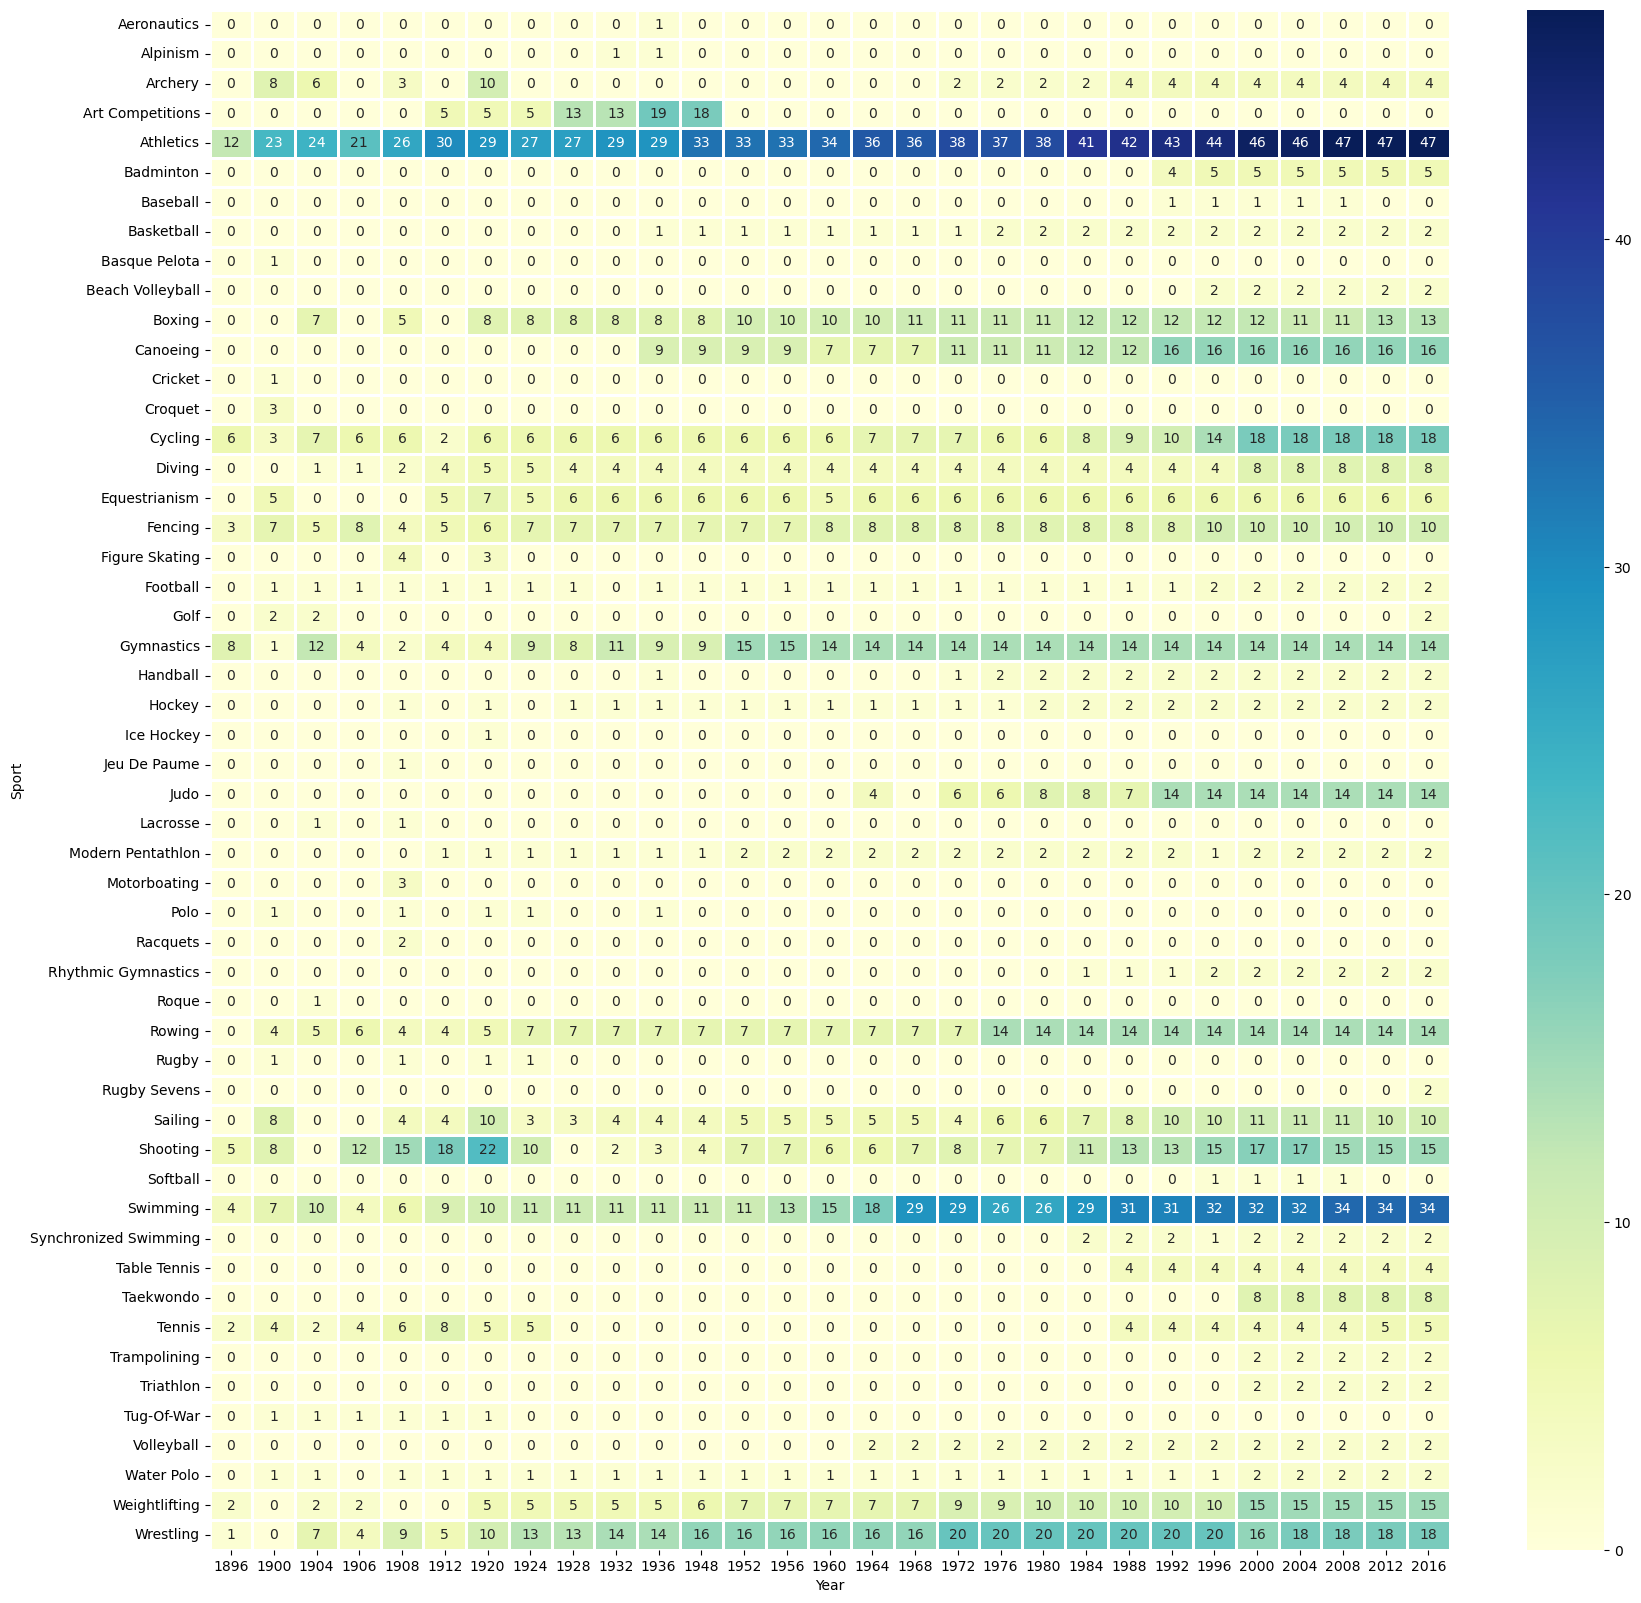

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(heatmap_df.pivot_table(index="Sport", columns="Year", aggfunc="count").fillna(
    0)["ID"].astype(int), linewidths=1, cmap="YlGnBu", annot=True)

In [151]:
def most_successfull_athelete(df, sport):
    df = df.dropna(subset=["Medal"])

    if sport != "Overall":
        df = df[df["Sport"] == sport]

    temp_df = df["Name"].value_counts().reset_index().merge(
        df, left_on="Name", right_on="Name", how="left")[["Name", "count", "Sport", "region"]].drop_duplicates()
    return temp_df


most_successfull_athelete(df, "Gymnastics")

,Name,count,Sport,region
0,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
18,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
33,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
46,Takashi Ono,13,Gymnastics,Japan
59,Sawao Kato,12,Gymnastics,Japan
...,...,...,...,...
2251,Valdemar Jensen Bggild,1,Gymnastics,Denmark
2252,milie Le Pennec,1,Gymnastics,France
2253,Rolf Lefdahl,1,Gymnastics,Norway
2254,Marius Ludvig Lefevre,1,Gymnastics,Denmark


Country wise anaylsis

- Countrywise medal tally per year(line plot)
- What countries are goog at heatmap
- Most successful Athletes(Top 10)


In [161]:
def yearwise_medal_tally(df, country):
    temp_df = df.dropna(subset=["Medal"]).drop_duplicates(subset=[
        "Team", "NOC", "Games", "Year", "City", "Sport", "Event", "Medal"])
    temp_df = temp_df[temp_df["region"] == country]
    temp_df = temp_df.groupby("Year").count()["Medal"].reset_index()

    return temp_df


yearwise_medal_tally = yearwise_medal_tally(df, "India")
yearwise_medal_tally

,Year,Medal
0,1900,2
1,1928,1
2,1932,1
3,1936,1
4,1948,1
5,1952,2
6,1956,1
7,1960,1
8,1964,1
9,1968,1


In [160]:
fig = px.line(yearwise_medal_tally, x="Year", y="Medal")
fig.show()

In [169]:
# Heatmap for showing the number of medals won by each country in each year

def country_yearwise_medal_tally_overyear(df, county):
    temp_df = df.dropna(subset=["Medal"]).drop_duplicates(subset=[
        "Team", "NOC", "Games", "Year", "City", "Sport", "Event", "Medal"])
    temp_df = temp_df[temp_df["region"] == county]

    return temp_df


country_yearwise_medal_tally_overyear = country_yearwise_medal_tally_overyear(
    df, "USA")
country_yearwise_medal_tally_overyear

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
124,84,Stephen Anthony Abas,M,26.0,165.0,55.0,United States,USA,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver,USA,NaN,0,0,1
214,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA,NaN,0,1,0
217,153,Monica Cecilia Abbott,F,23.0,191.0,88.0,United States,USA,2008 Summer,2008,Summer,Beijing,Softball,Softball Women's Softball,Silver,USA,NaN,0,0,1
242,165,Nia Nicole Abdallah,F,20.0,175.0,56.0,United States,USA,2004 Summer,2004,Summer,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver,USA,NaN,0,0,1
540,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold,USA,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219576,133685,Mariel Leigh Zagunis,F,19.0,173.0,72.0,United States,USA,2004 Summer,2004,Summer,Athina,Fencing,"Fencing Women's Sabre, Individual",Gold,USA,NaN,0,1,0
219577,133685,Mariel Leigh Zagunis,F,23.0,173.0,72.0,United States,USA,2008 Summer,2008,Summer,Beijing,Fencing,"Fencing Women's Sabre, Individual",Gold,USA,NaN,0,1,0
220106,134016,"Peter Timothy ""Pete"" Zaremba",M,24.0,195.0,92.0,United States,USA,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Men's Hammer Throw,Bronze,USA,NaN,1,0,0
221655,135017,Suzanne Winona Zimmerman (-Edwards),F,23.0,NaN,NaN,United States,USA,1948 Summer,1948,Summer,London,Swimming,Swimming Women's 100 metres Backstroke,Silver,USA,NaN,0,0,1


<Axes: xlabel='Year', ylabel='Sport'>

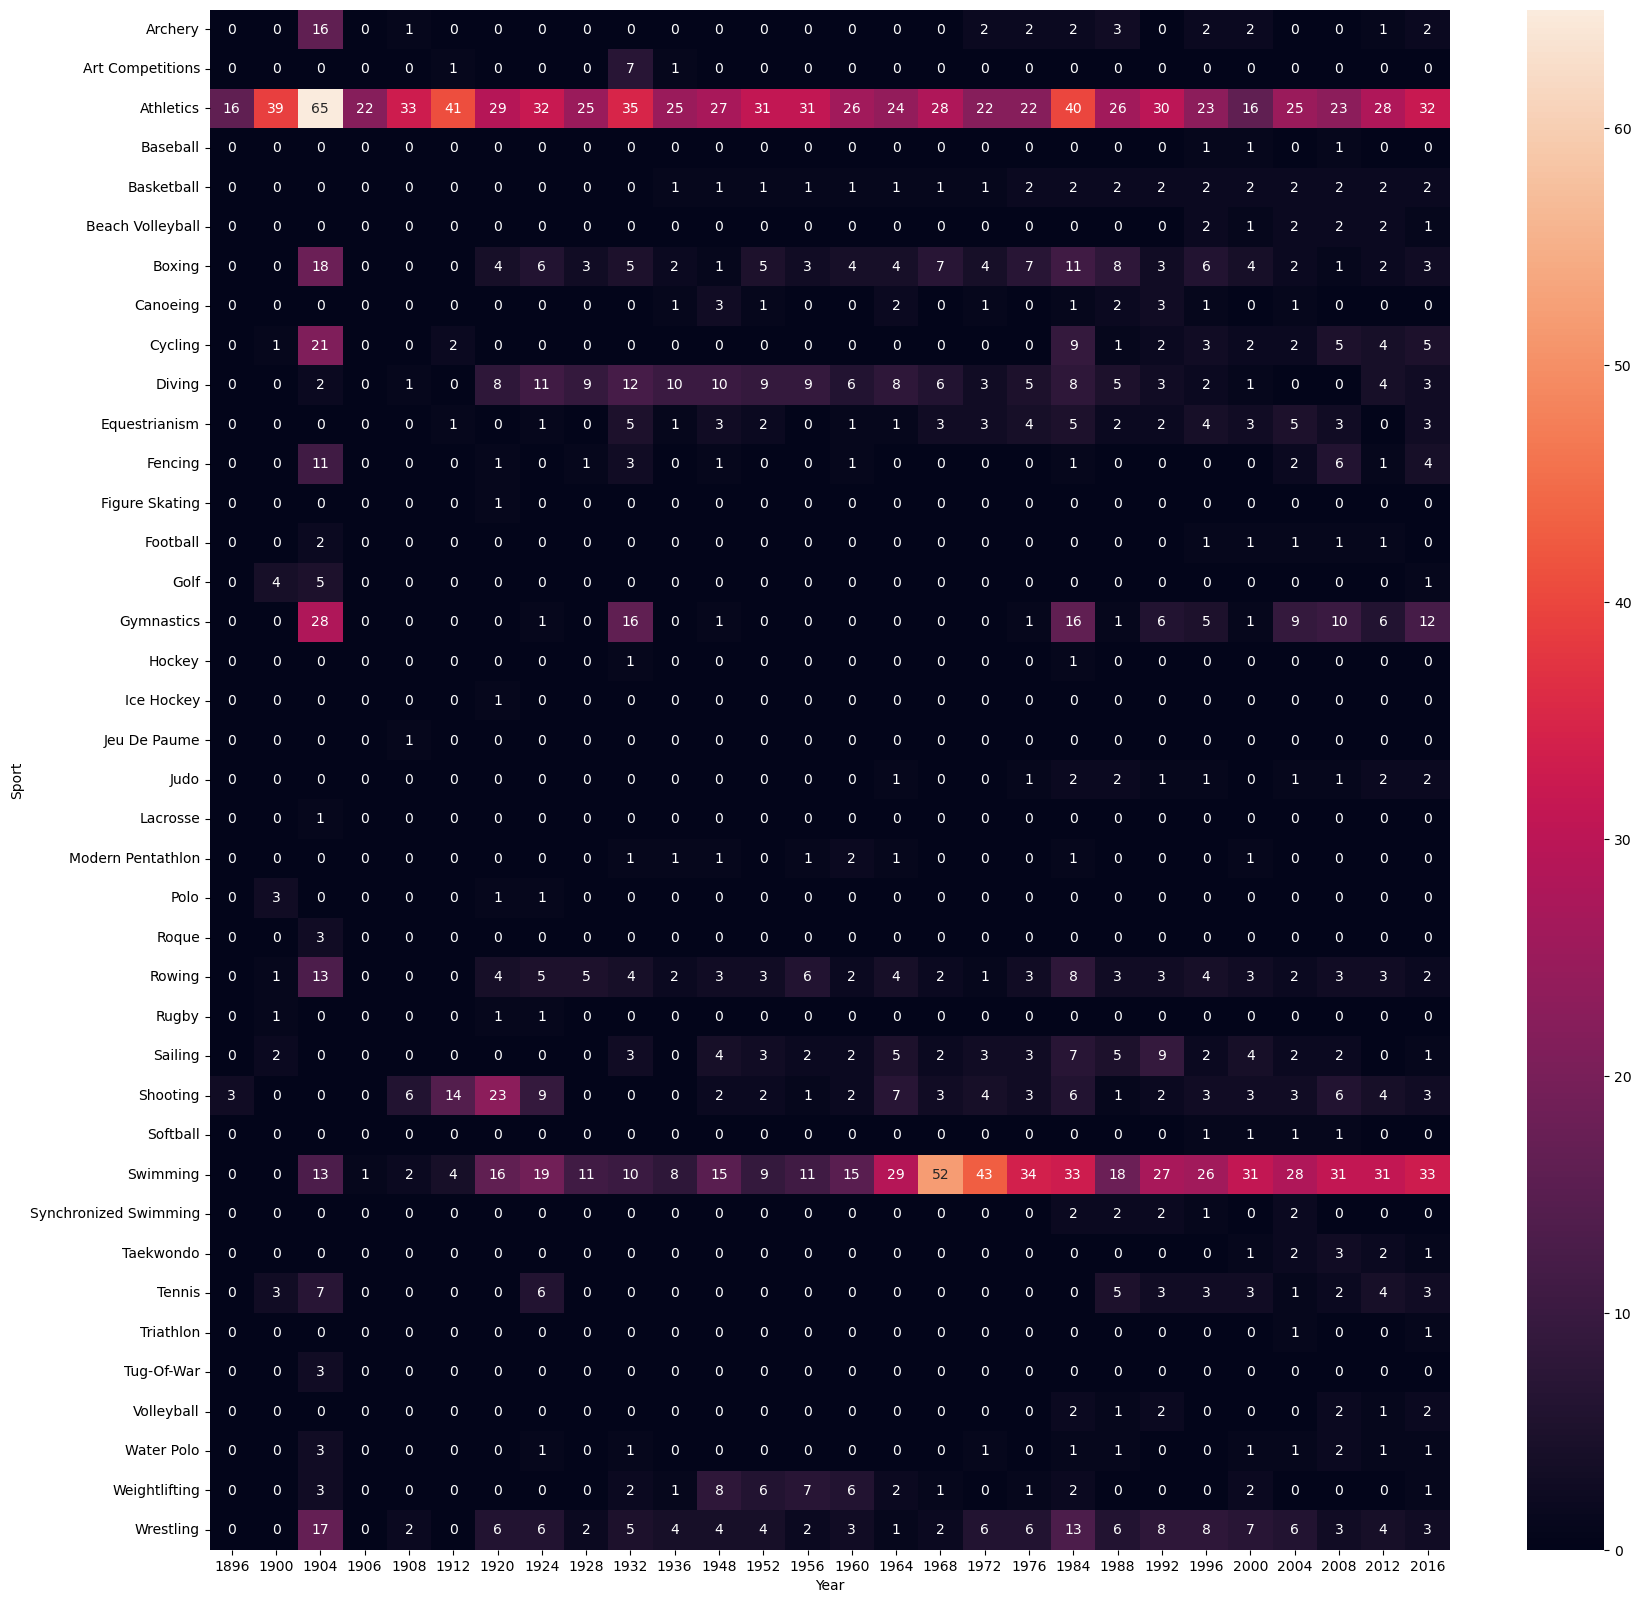

In [170]:
country_yearwise_medal_tally_overyear.pivot_table(
    index="Sport", columns="Year", aggfunc="count", values="Medal").fillna(0).astype(int)
plt.figure(figsize=(20, 20))
sns.heatmap(country_yearwise_medal_tally_overyear.pivot_table(
    index="Sport", columns="Year", values="Medal", aggfunc="count").fillna(0).astype(int), annot=True)

In [173]:
# Top 10 athletes of any country

def most_successfull_athelete_countrywise(df, county):
    df = df.dropna(subset=["Medal"])

    df = df[df["region"] == county]
    temp_df = df["Name"].value_counts().reset_index().merge(
        df, left_on="Name", right_on="Name", how="left")[["Name", "count", "Sport"]].drop_duplicates()
    return temp_df


most_successfull_athelete_countrywise(df, "India")

,Name,count,Sport
0,Udham Singh Kular,4,Hockey
4,Leslie Walter Claudius,4,Hockey
8,Shankar Pillay Laxman,3,Hockey
11,Ranganathan Francis,3,Hockey
14,Richard James Allen,3,Hockey
...,...,...,...
185,Ahsan Muhammad Khan,1,Hockey
186,Ahmed Sher Khan,1,Hockey
187,Maharaj Krishon Kaushik,1,Hockey
188,"Patrick Anthony ""Pat"" Jansen",1,Hockey


Athlete-wise Analysis


In [174]:
# We have duplicate athletes in the dataset, if they have won medals in different years
# So we need to remove those duplicates

atheletes_df = df.drop_duplicates(subset=["Name", "region"])
atheletes_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222544,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,Russia,NaN,1,0,0
222546,135565,Fernando scar Zylberberg,M,23.0,168.0,76.0,Argentina,ARG,2000 Summer,2000,Summer,Sydney,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [181]:
import plotly.figure_factory as ff

age = atheletes_df["Age"].dropna()
gold_medalist = atheletes_df[atheletes_df["Medal"] == "Gold"]["Age"].dropna()
silver_medalist = atheletes_df[atheletes_df["Medal"]
                               == "Silver"]["Age"].dropna()
bronze_medalist = atheletes_df[atheletes_df["Medal"]
                               == "Bronze"]["Age"].dropna()

fig = ff.create_distplot([age, gold_medalist, silver_medalist, bronze_medalist], [
                         "Overall Age", "Gold Medalist", "Silver Medalist", "Bronze Medalist"], show_hist=False, show_rug=False)
fig.show()

In [182]:
atheletes_df["Sport"].dropna().unique().tolist()

['Basketball',
 'Judo',
 'Football',
 'Tug-Of-War',
 'Athletics',
 'Swimming',
 'Badminton',
 'Sailing',
 'Gymnastics',
 'Art Competitions',
 'Handball',
 'Weightlifting',
 'Wrestling',
 'Water Polo',
 'Hockey',
 'Rowing',
 'Fencing',
 'Equestrianism',
 'Shooting',
 'Boxing',
 'Taekwondo',
 'Cycling',
 'Diving',
 'Canoeing',
 'Tennis',
 'Modern Pentathlon',
 'Golf',
 'Softball',
 'Archery',
 'Volleyball',
 'Synchronized Swimming',
 'Table Tennis',
 'Baseball',
 'Rhythmic Gymnastics',
 'Rugby Sevens',
 'Trampolining',
 'Beach Volleyball',
 'Triathlon',
 'Rugby',
 'Lacrosse',
 'Polo',
 'Cricket',
 'Ice Hockey',
 'Racquets',
 'Motorboating',
 'Croquet',
 'Figure Skating',
 'Jeu De Paume',
 'Roque',
 'Basque Pelota',
 'Alpinism',
 'Aeronautics']